## VOTING 방식 모델 구현
 - 데이터 : breast cancer
  - 유형 : 지도학습 -> 분류
  - 방법 : Voting 방식으로 진행 : LogisticRegression, DecisionTreeClassifier, SVC
  - 학습 데이터셋: 동일한 데이터셋으로 3개의 모델 학습 진행

1. 모듈 로딩, 데이터 준비

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
x,y = load_breast_cancer(as_frame = True, return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=5, test_size=0.2, stratify= y)

2. 학습 진행
<hr>

2 - 1. 앙상블 보팅 학습에 사용할 모델 인스턴스 생성

In [4]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(xtrain, ytrain)

2 - 2. DecisionTree

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier()

2 - 3. SVC

In [12]:
from sklearn.svm import SVC

In [13]:
svc_model = SVC()
svc_model.fit(xtrain, ytrain)

SVC()

In [17]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

#동일 데이터셋으로 병렬학습 진행할 모델 리스트 선정 및 결과 결정 방법 설정하기
vt_model = VotingClassifier(estimators=[('lr_model',lr_model),('dt_model',dt_model),('svc_model',svc_model)], 
                            verbose=True, voting='hard')

In [18]:
# 동일 데이터셋을 전달해서 3개의 모델 동시에 학습 진행
vt_model.fit(xtrain, ytrain)

[Voting] ................. (1 of 3) Processing lr_model, total=   0.0s
[Voting] ................. (2 of 3) Processing dt_model, total=   0.0s
[Voting] ................ (3 of 3) Processing svc_model, total=   0.0s


VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(solver='liblinear')),
                             ('dt_model', DecisionTreeClassifier()),
                             ('svc_model', SVC())],
                 verbose=True)

In [26]:
#예측하기
#newdata = pd.DataFrame([xtest.iloc[0]], columns=xtest.columns)
newdata = xtest.iloc[0].to_frame().T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
525,8.571,13.1,54.53,221.3,0.1036,0.07632,0.02565,0.0151,0.1678,0.07126,...,9.473,18.45,63.3,275.6,0.1641,0.2235,0.1754,0.08512,0.2983,0.1049


In [29]:

vt_model.predict(newdata)
vt_model.predict_proba(xtest)

AttributeError: predict_proba is not available when voting='hard'

In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [31]:
#voting instance 내의 학습기들
vt_model.estimators_[0], 
 
#vt_model.named_estimators_.get('lr_model').predict(newdata)

array([1], dtype=int64)

In [33]:
for key, value in vt_model.named_estimators_.items():
    print(key, value.predict(newdata))

lr_model [1]
dt_model [1]
svc_model [1]


In [36]:
#3개 알고리즘 모델에 대한 성능 평가
print(f'[Logistic Regression]\n Train; {lr_model.score(xtrain, ytrain)}\n Test; {lr_model.score(xtest,ytest)}\n')
print(f'[DecisionTree]\n Train; {dt_model.score(xtrain, ytrain)}\n Test; {dt_model.score(xtest,ytest)}\n')
print(f'[Voting]\n Train; {vt_model.score(xtrain, ytrain)}\n test; {vt_model.score(xtest,ytest)}')
print(f'[RandomForest]\n Train; {rf_model.score(xtrain, ytrain)}\n test; {rf_model.score(xtest,ytest)}')

[Logistic Regression]
 Train; 0.9582417582417583
 Test; 0.9649122807017544

[DecisionTree]
 Train; 1.0
 Test; 0.9210526315789473

[Voting]
 Train; 0.967032967032967
 test; 0.9385964912280702
[RandomForest]
 Train; 1.0
 test; 0.9649122807017544


In [39]:
featuresDF = pd.DataFrame([rf_model.feature_names_in_, rf_model.feature_importances_])
featuresDF = featuresDF.T
featuresDF.set_index(0, inplace=True)

In [41]:
featuresDF.sort_values(by = 1, ascending=False)

,1
0,
worst perimeter,0.155148
worst radius,0.126068
worst concave points,0.100623
worst area,0.099947
mean concave points,0.097021
mean concavity,0.057662
mean area,0.054909
area error,0.044047
worst concavity,0.041365


<Axes: ylabel='0'>

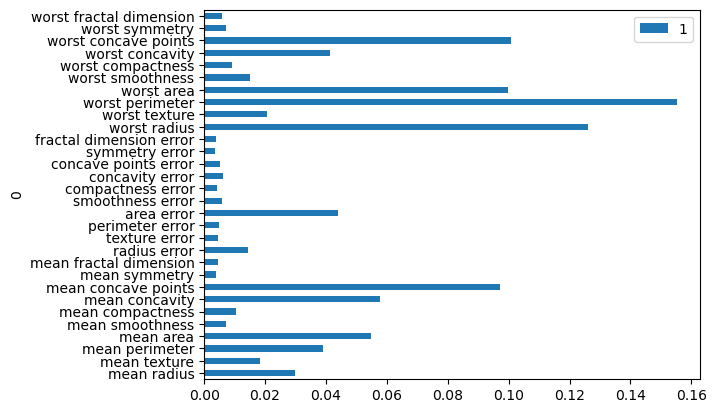

In [43]:
featuresDF.plot(kind='barh')